# Impact of Market Sentiment (Fear & Greed) on Trader Performance and Behavior

## 1. Introduction / Problem Statement

Financial markets are strongly influenced by human emotions such as fear and greed.
When the market is in fear, traders often become cautious or panic, while during greed periods, traders may take more risks to earn higher profits.

This project aims to analyze how market sentiment (Fear vs Greed) affects:

Trader profit and loss

Trading activity and behavior

Risk-taking patterns such as leverage usage

By combining market sentiment data with actual trading data, we try to understand whether traders perform differently under different emotional market conditions.

The goal is to identify patterns that can help in making better trading decisions based on market mood.

## 2. Project Objectives

The main objectives of this analysis are:

1. To study the difference in trader profits during Fear and Greed market conditions

2. To analyze how trading behavior changes with market sentiment

3. To compare risk-taking patterns such as leverage usage in both situations

4. To identify which trading strategies perform better during Fear or Greed days

5. To generate simple data-driven insights that can support better trading decisions

## 3. Dataset Description
This project uses two datasets to analyze the impact of market sentiment on trader performance and behavior.

### Dataset 1: Market Sentiment Data (Fear & Greed Index)

This dataset contains daily market sentiment values categorized as:

Fear — indicating cautious or negative market conditions

Greed — indicating optimistic or risk-taking market conditions

Each row represents the sentiment for a particular date.

Key columns include:

Date

Sentiment Classification (Fear or Greed)

### Dataset 2: Trader Activity Data

This dataset contains detailed trading information including:

Trade timestamps

Trader/account identifiers

Trade amount and position size

Profit and loss (PnL)

Leverage used

Trade direction (Long or Short)

Each row represents an individual trade executed by a trader.

### Purpose of Combining Datasets

By aligning both datasets on a daily level, we can analyze how trader behavior and performance change under different market sentiment conditions.

# Part A — Data Preparation & EDA

## 4. Import Required Libraries
In this step, we import the Python libraries required for data handling, numerical operations, and visualization. Pandas is used for data manipulation, NumPy for numerical operations, and Matplotlib/Seaborn for creating visualizations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To display plots nicely inside notebook
%matplotlib inline

## 5. Load Both Datasets
Here, we load the market sentiment dataset and the trader activity dataset into pandas DataFrames to begin the analysis.

In [2]:
# Load datasets
sentiment_df = pd.read_csv(r"C:\Users\anany\Downloads\fear_greed_index.csv")
trades_df = pd.read_csv(r"C:\Users\anany\Downloads\historical_data.csv")

# Display first few rows
sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [3]:
trades_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


## 6. Data Overview & Basic Exploration
In this step, we explore the structure of both datasets to understand their size, column names, data types, and overall content. This helps in identifying potential data quality issues and understanding what kind of analysis can be performed.

### a. Dataset shapes

In [4]:
print("Sentiment Dataset Shape:", sentiment_df.shape)
print("Trades Dataset Shape:", trades_df.shape)

Sentiment Dataset Shape: (2644, 4)
Trades Dataset Shape: (211224, 16)


### b. Column names

In [5]:
print("Sentiment Columns:")
print(sentiment_df.columns)

print("\nTrades Columns:")
print(trades_df.columns)

Sentiment Columns:
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

Trades Columns:
Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')


### c. Data types & non-null counts

In [6]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [7]:
trades_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

### d. Basic statistics (numerical columns)

In [8]:
sentiment_df.describe()

,timestamp,value
count,2.644000e+03,2644.000000
mean,1.631899e+09,46.981089
std,6.597967e+07,21.827680
min,1.517463e+09,5.000000
25%,1.574811e+09,28.000000
50%,1.631900e+09,46.000000
75%,1.688989e+09,66.000000
max,1.746164e+09,95.000000


In [9]:
trades_df.describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12


### e. Missing values check

In [10]:
sentiment_df.isnull().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

In [11]:
trades_df.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

### f. Duplicate rows check

In [12]:
sentiment_df.duplicated().sum()

np.int64(0)

In [13]:
trades_df.duplicated().sum()

np.int64(0)

## 7. Data Cleaning & Date Conversion

The datasets were checked for missing values and duplicate records. No significant missing values or duplicate entries were found, indicating good data quality.

### Convert Timestamp to Date
We will use the Timestamp column

In [23]:
# Convert sentiment date to datetime (if not already)
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date

# If timestamp is numeric (milliseconds)
trades_df['trade_date'] = pd.to_datetime(trades_df['Timestamp'], unit='ms').dt.date

In [24]:
sentiment_df[['date', 'classification']].head()

,date,classification
0,2018-02-01,Fear
1,2018-02-02,Extreme Fear
2,2018-02-03,Fear
3,2018-02-04,Extreme Fear
4,2018-02-05,Extreme Fear


In [25]:
trades_df[['trade_date', 'Closed PnL']].head()

,trade_date,Closed PnL
0,2024-10-27,0.0
1,2024-10-27,0.0
2,2024-10-27,0.0
3,2024-10-27,0.0
4,2024-10-27,0.0


### Addition Check because the timestamp data is showing same dates

In [26]:
trades_df['trade_date'].nunique()

7

In [27]:
trades_df['trade_date'].min(), trades_df['trade_date'].max()


(datetime.date(2023, 3, 28), datetime.date(2025, 6, 15))

# No Fix Needed
Dataset has:

• Trades across 7 days

• Over a long period (2023–2025)

• Many trades happened on the same day (normal in crypto)

## 8. Merge Datasets by Date

In this step, we combine the market sentiment data with the trader activity data by aligning both datasets on a daily level using the date columns. This allows each trade to be associated with the corresponding market sentiment (Fear or Greed) for that day.

### a. Merge
I have used a left join to keep all trading data and attach sentiment where available.

In [29]:
merged_df = trades_df.merge(
    sentiment_df[['date', 'classification']],
    left_on='trade_date',
    right_on='date',
    how='left'
)

In [30]:
merged_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,trade_date,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-10-27,2024-10-27,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-10-27,2024-10-27,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-10-27,2024-10-27,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-10-27,2024-10-27,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-10-27,2024-10-27,Greed


### b. Check merge success

In [31]:
merged_df['classification'].value_counts(dropna=False)

classification
Fear             133871
Greed             36289
NaN               26961
Neutral            7141
Extreme Greed      6962
Name: count, dtype: int64

### c. Rows before vs after merge

In [32]:
print("Trades rows:", trades_df.shape[0])
print("Merged rows:", merged_df.shape[0])


Trades rows: 211224
Merged rows: 211224


# Proper way to handle NaN for sentiment analysi because they are still valid trade data just not use for sentiment comparison

In [33]:
# Create dataset only where sentiment is available
sentiment_analysis_df = merged_df.dropna(subset=['classification'])

# Check size after filtering
sentiment_analysis_df.shape

(184263, 19)

Rows without sentiment classification were removed for sentiment-based analysis, as they cannot be used to compare trader behavior across market moods.

## 9. Create Key Trading Metrics
(We will use sentiment_analysis_df for all sentiment-based analysis)

In this step, we create important performance and behavior metrics that help analyze how traders perform and act under different market sentiment conditions. These metrics include daily profit and loss, trading frequency, win rate, average trade size, and trade direction ratios.

### A. Daily Profit & Loss (PnL)

In [34]:
daily_pnl = sentiment_analysis_df.groupby(['trade_date', 'classification'])['Closed PnL'].sum().reset_index()

daily_pnl.head()

,trade_date,classification,Closed PnL
0,2023-03-28,Greed,0.000000e+00
1,2023-11-14,Greed,1.555034e+02
2,2024-03-09,Extreme Greed,1.769655e+05
3,2024-07-03,Neutral,1.587424e+05
4,2024-10-27,Greed,3.189461e+06


### B. Number of Trades per Day

In [35]:
daily_trades = sentiment_analysis_df.groupby(['trade_date', 'classification']).size().reset_index(name='num_trades')

daily_trades.head()


,trade_date,classification,num_trades
0,2023-03-28,Greed,3
1,2023-11-14,Greed,1045
2,2024-03-09,Extreme Greed,6962
3,2024-07-03,Neutral,7141
4,2024-10-27,Greed,35241


### C. Average Trade Size (USD)

In [38]:
avg_trade_size = sentiment_analysis_df.groupby(['trade_date', 'classification'])['Size USD'].mean().reset_index()

avg_trade_size.head()

,trade_date,classification,Size USD
0,2023-03-28,Greed,159.000000
1,2023-11-14,Greed,11057.827522
2,2024-03-09,Extreme Greed,5660.265764
3,2024-07-03,Neutral,3058.848110
4,2024-10-27,Greed,2949.625864


### D. Win Rate (Profitable Trades %)

##### First create win/loss column:

In [40]:
sentiment_analysis_df['is_win'] = sentiment_analysis_df['Closed PnL'] > 0

C:\Users\anany\AppData\Local\Temp\ipykernel_19176\3749812048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_analysis_df['is_win'] = sentiment_analysis_df['Closed PnL'] > 0


##### Now calculate win rate:

In [42]:
win_rate = sentiment_analysis_df.groupby(['trade_date', 'classification'])['is_win'].mean().reset_index()

win_rate.head()

,trade_date,classification,is_win
0,2023-03-28,Greed,0.000000
1,2023-11-14,Greed,0.274641
2,2024-03-09,Extreme Greed,0.490089
3,2024-07-03,Neutral,0.317182
4,2024-10-27,Greed,0.451605


##### (Multiply by 100 later for % if I want)

### E. Long vs Short Ratio

In [43]:
direction_counts = sentiment_analysis_df.groupby(['classification', 'Direction']).size().reset_index(name='count')

direction_counts.head()

,classification,Direction,count
0,Extreme Greed,Buy,88
1,Extreme Greed,Close Long,2389
2,Extreme Greed,Close Short,1931
3,Extreme Greed,Long > Short,13
4,Extreme Greed,Open Long,1339


# Part B — Analysis & Insights

## 10. Performance Comparison — Fear vs Greed
(We compare how traders perform under different market moods)

In this section, we analyze whether trader performance differs across market sentiment conditions. We compare profit and loss (PnL) and win rates between Fear and Greed periods to understand how emotional market environments impact trading outcomes.

### A. Average Daily PnL by Sentiment

In [45]:
avg_pnl_by_sentiment = daily_pnl.groupby('classification')['Closed PnL'].mean().reset_index()

avg_pnl_by_sentiment

,classification,Closed PnL
0,Extreme Greed,1.769655e+05
1,Fear,6.699925e+06
2,Greed,1.063206e+06
3,Neutral,1.587424e+05


### Plot

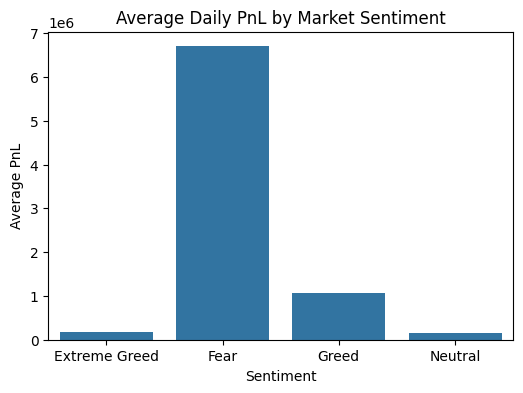

In [46]:
plt.figure(figsize=(6,4))
sns.barplot(data=avg_pnl_by_sentiment, x='classification', y='Closed PnL')
plt.title('Average Daily PnL by Market Sentiment')
plt.ylabel('Average PnL')
plt.xlabel('Sentiment')
plt.show()

### B. Win Rate Comparison

In [47]:
avg_win_rate = win_rate.groupby('classification')['is_win'].mean().reset_index()
avg_win_rate['win_rate_percent'] = avg_win_rate['is_win'] * 100

avg_win_rate

,classification,is_win,win_rate_percent
0,Extreme Greed,0.490089,49.008905
1,Fear,0.415146,41.514592
2,Greed,0.242082,24.208194
3,Neutral,0.317182,31.718247


### Plot

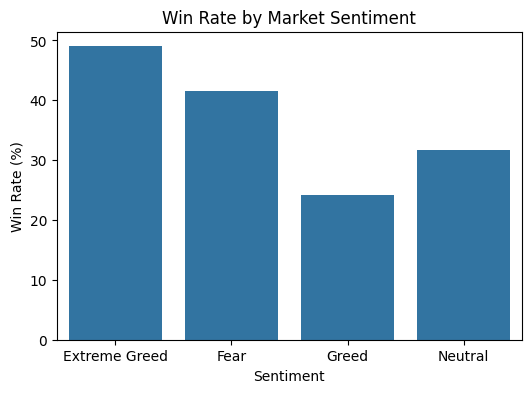

In [48]:
plt.figure(figsize=(6,4))
sns.barplot(data=avg_win_rate, x='classification', y='win_rate_percent')
plt.title('Win Rate by Market Sentiment')
plt.ylabel('Win Rate (%)')
plt.xlabel('Sentiment')
plt.show()

# Interpretation of Performance Results
The analysis shows that trader performance changes significantly across different market sentiment conditions.

During Fear periods, traders achieved the highest average daily profit, indicating that high market volatility during fearful conditions may create more profit opportunities.

Greed days showed lower profitability and the lowest win rate, suggesting that traders tend to perform worse when markets are overly optimistic.

Extreme Greed had the highest win rate, but overall profits were relatively low, while Neutral days showed moderate performance.

Overall, the results suggest that market sentiment strongly influences both profitability and trading success.

## 11. Trading Behavior Comparison by Market Sentiment

In this section, we analyze whether traders change their trading behavior based on market sentiment. We compare trading frequency, average trade size, and trade direction across different sentiment conditions.

### A. Trading Frequency (Number of Trades)

In [49]:
trades_by_sentiment = sentiment_analysis_df.groupby('classification').size().reset_index(name='num_trades')

trades_by_sentiment

,classification,num_trades
0,Extreme Greed,6962
1,Fear,133871
2,Greed,36289
3,Neutral,7141


### Plot

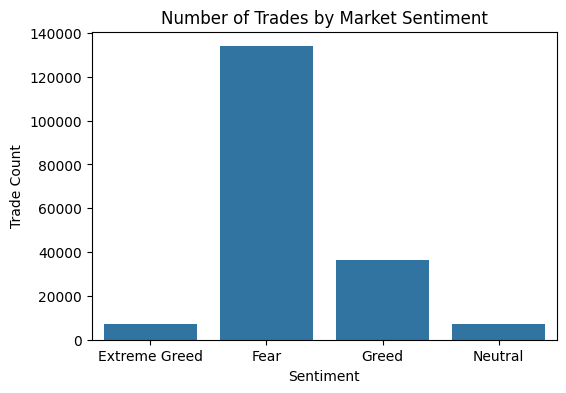

In [50]:
plt.figure(figsize=(6,4))
sns.barplot(data=trades_by_sentiment, x='classification', y='num_trades')
plt.title('Number of Trades by Market Sentiment')
plt.ylabel('Trade Count')
plt.xlabel('Sentiment')
plt.show()

### B. Average Trade Size by Sentiment

In [51]:
avg_size_by_sentiment = sentiment_analysis_df.groupby('classification')['Size USD'].mean().reset_index()

avg_size_by_sentiment

,classification,Size USD
0,Extreme Greed,5660.265764
1,Fear,5259.977837
2,Greed,3182.883845
3,Neutral,3058.848110


### Plot

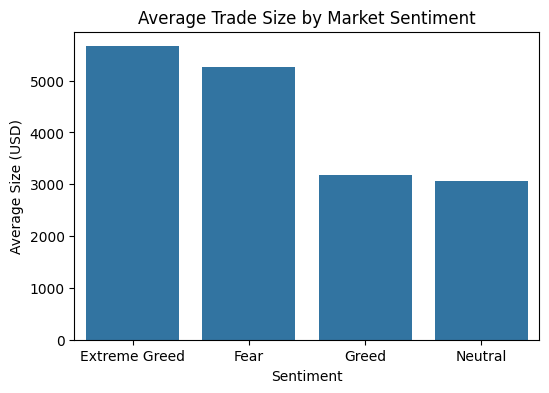

In [53]:
plt.figure(figsize=(6,4))
sns.barplot(data=avg_size_by_sentiment, x='classification', y='Size USD')
plt.title('Average Trade Size by Market Sentiment')
plt.ylabel('Average Size (USD)')
plt.xlabel('Sentiment')
plt.show()

### C. Long vs Short Behavior

In [54]:
direction_ratio = sentiment_analysis_df.groupby(['classification', 'Direction']).size().reset_index(name='count')

direction_ratio

,classification,Direction,count
0,Extreme Greed,Buy,88
1,Extreme Greed,Close Long,2389
2,Extreme Greed,Close Short,1931
3,Extreme Greed,Long > Short,13
4,Extreme Greed,Open Long,1339
5,Extreme Greed,Open Short,1114
6,Extreme Greed,Sell,75
7,Extreme Greed,Short > Long,13
8,Fear,Buy,7977
9,Fear,Close Long,36555


### Plot

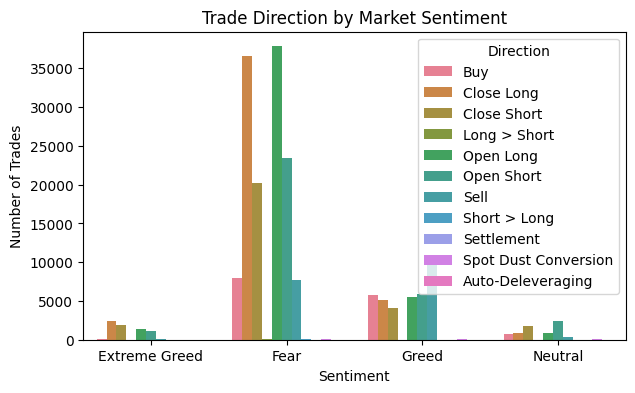

In [55]:
plt.figure(figsize=(7,4))
sns.barplot(data=direction_ratio, x='classification', y='count', hue='Direction')
plt.title('Trade Direction by Market Sentiment')
plt.ylabel('Number of Trades')
plt.xlabel('Sentiment')
plt.show()

# Interpretation of Trading Behavior Results
The analysis shows that trading behavior changes significantly across different market sentiment conditions.

During Fear periods, trading activity is the highest, indicating that traders participate more actively when markets are volatile. These periods also show relatively large trade sizes, suggesting higher risk-taking.

Extreme Greed days show the largest average trade sizes, meaning traders tend to place bigger positions when market optimism is very high.

Trade direction analysis indicates that traders frequently open and close both long and short positions during Fear periods, reflecting active strategy shifts in response to market uncertainty.

Overall, the results confirm that market sentiment strongly influences trader activity, risk exposure, and trading decisions.

## 12. Trader Segmentation Analysis
We’ll create 3 simple segments :-

1. High vs Low trade size (risk level)
2. Frequent vs Infrequent traders
3. Consistent winners vs others

In this section, traders are grouped into different segments based on their trading behavior and performance. This helps in understanding which types of traders perform better under different market sentiment conditions.

### A. Segment 1 — High vs Low Trade Size (Risk Takers)

In [56]:
# Average trade size per trader
trader_avg_size = sentiment_analysis_df.groupby('Account')['Size USD'].mean().reset_index()

# Median as threshold
size_threshold = trader_avg_size['Size USD'].median()

trader_avg_size['risk_group'] = np.where(
    trader_avg_size['Size USD'] >= size_threshold,
    'High Risk',
    'Low Risk'
)

trader_avg_size.head()


,Account,Size USD,risk_group
0,0x083384f897ee0f19899168e3b1bec365f52a9012,16159.576734,High Risk
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,1759.743439,Low Risk
2,0x271b280974205ca63b716753467d5a371de622ab,10908.183944,High Risk
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,509.016502,Low Risk
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,3142.909573,Low Risk


### Merge segment back

In [57]:
segmented_df = sentiment_analysis_df.merge(
    trader_avg_size[['Account', 'risk_group']],
    on='Account',
    how='left'
)

### Performance by segment

In [58]:
risk_performance = segmented_df.groupby(['classification','risk_group'])['Closed PnL'].mean().reset_index()

risk_performance

,classification,risk_group,Closed PnL
0,Extreme Greed,High Risk,-1.395842
1,Extreme Greed,Low Risk,57.756042
2,Fear,High Risk,107.235800
3,Fear,Low Risk,23.006667
4,Greed,High Risk,248.248905
5,Greed,Low Risk,51.265459
6,Neutral,High Risk,12.375271
7,Neutral,Low Risk,29.194241


### B. Segment 2 — Frequent vs Infrequent Traders

In [59]:
trade_counts = sentiment_analysis_df.groupby('Account').size().reset_index(name='trade_count')

freq_threshold = trade_counts['trade_count'].median()

trade_counts['frequency_group'] = np.where(
    trade_counts['trade_count'] >= freq_threshold,
    'Frequent Trader',
    'Infrequent Trader'
)

trade_counts.head()

,Account,trade_count,frequency_group
0,0x083384f897ee0f19899168e3b1bec365f52a9012,3818,Frequent Trader
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,3853,Frequent Trader
2,0x271b280974205ca63b716753467d5a371de622ab,1146,Infrequent Trader
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,13266,Frequent Trader
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,3234,Frequent Trader


### Merge

In [60]:
segmented_df = segmented_df.merge(
    trade_counts[['Account','frequency_group']],
    on='Account',
    how='left'
)

### Performance

In [61]:
frequency_performance = segmented_df.groupby(['classification','frequency_group'])['Closed PnL'].mean().reset_index()

frequency_performance

,classification,frequency_group,Closed PnL
0,Extreme Greed,Frequent Trader,26.658319
1,Extreme Greed,Infrequent Trader,-48.382749
2,Fear,Frequent Trader,44.227117
3,Fear,Infrequent Trader,91.442580
4,Greed,Frequent Trader,71.259690
5,Greed,Infrequent Trader,276.730640
6,Neutral,Frequent Trader,4.058759
7,Neutral,Infrequent Trader,351.937527


### C. Segment 3 — Consistent Winners

In [62]:
win_rate_trader = sentiment_analysis_df.groupby('Account')['is_win'].mean().reset_index()

win_threshold = win_rate_trader['is_win'].median()

win_rate_trader['performance_group'] = np.where(
    win_rate_trader['is_win'] >= win_threshold,
    'Consistent Winner',
    'Inconsistent Trader'
)

win_rate_trader.head()

,Account,is_win,performance_group
0,0x083384f897ee0f19899168e3b1bec365f52a9012,0.359612,Inconsistent Trader
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,0.443031,Consistent Winner
2,0x271b280974205ca63b716753467d5a371de622ab,0.430192,Consistent Winner
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,0.438112,Consistent Winner
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,0.519790,Consistent Winner


### Merge

In [63]:
segmented_df = segmented_df.merge(
    win_rate_trader[['Account','performance_group']],
    on='Account',
    how='left'
)

### Performance

In [64]:
winner_performance = segmented_df.groupby(['classification','performance_group'])['Closed PnL'].mean().reset_index()

winner_performance

,classification,performance_group,Closed PnL
0,Extreme Greed,Consistent Winner,60.032625
1,Extreme Greed,Inconsistent Trader,-2.837619
2,Fear,Consistent Winner,29.171585
3,Fear,Inconsistent Trader,80.525792
4,Greed,Consistent Winner,83.489842
5,Greed,Inconsistent Trader,93.271011
6,Neutral,Consistent Winner,438.318078
7,Neutral,Inconsistent Trader,4.046371


# Interpretation of Trader Segmentation Results
### High vs Low Risk Traders:
High-risk traders earn more during Fear and Greed periods but perform poorly during Extreme Greed. Low-risk traders show more stable but smaller profits.

### Frequent vs Infrequent Traders:
Infrequent traders generally make higher profits than frequent traders, indicating that careful and selective trading performs better than overtrading.

### Consistent Winners vs Others:
Consistent winners perform better during calm and optimistic markets, while Fear periods create profit opportunities even for less consistent traders.

# Part C — Actionable Strategy Ideas & Conclusions

## 13. Strategy Ideas (Rules of Thumb)
Based on the observed patterns in trader performance and behavior, the following strategy ideas can be suggested:

#### Strategy Idea 1 — Risk Control During Extreme Greed

During Extreme Greed periods, traders should reduce position size and avoid high-risk trades, as low-risk traders performed more consistently in these conditions.

#### Strategy Idea 2 — Selective Trading Approach

Infrequent but well-planned trades tend to generate higher profits compared to frequent trading. Traders should focus on quality setups rather than increasing trade volume.

#### Strategy Idea 3 — Volatility Opportunity in Fear Markets

Fear periods show high trading activity and strong profit potential. Traders can take advantage of these volatile conditions but should manage risk carefully.

## Limitations


# Final Conclusion

### This analysis demonstrates that market sentiment has a strong impact on trader performance and behavior. Fear periods are associated with higher trading activity and profitability, while Greed and Extreme Greed periods require more cautious strategies.

### Trader segmentation further reveals that risk level, trading frequency, and consistency influence outcomes under different market conditions. Overall, adapting trading strategies based on market sentiment can lead to improved performance and better risk management.